# Ejemplo mono

In [ ]:
import numpy as np
max_profundidad=9 # Inteligencia del mono
max_operaciones=14 # número de operaciones distintas
estado=np.zeros(max_profundidad,dtype=int) # Pila de estados
operaciones=np.zeros(max_profundidad,dtype=int)  # Pila de operaciones
texto=['Ir(M,1,2)','Ir(M,2,3)','Ir(M,3,2)','Ir(M,2,1)',
       'Empujar(M,C,1,2)','Empujar(M,C,2,3)','Empujar(M,C,2,1)','Empujar(M,C,3,2)',
       'Subir(M,C,1)','Subir(M,C,2)','Subir(M,C,3)',
       'Coger(M,P,1)','Coger(M,P,2)','Coger(M,P,3)']
PC=np.zeros(max_operaciones,dtype=int) # Lista de propiedades PC  para poder realizar la acción
E=np.zeros(max_operaciones,dtype=int) # Lista de propiedades a Eliminar de cada acción
A=np.zeros(max_operaciones,dtype=int) # Lista de propiedades a Añadir de cada acción
# Está(M,1)Está(M,2)Está(M,3)Está(C,1)Está(C,2)Está(C,3)Está(P,1)Está(P,2)Está(P,3)Libre(C)Sobre(M,C)Libre(P)Tiene(M,P)

vectorInicial=[3,1,2] # (M,P,C) ************ ENTRADA *************
#----------------------------------------------------------------------------------------------------
def mascaraInicio():
    mascara=''
    if (vectorInicial[0]==1):
        mascara= "100" # Está(M,1)
    if (vectorInicial[0]==2):
         mascara= "010" # Está(M,2)
    if (vectorInicial[0]==3):
         mascara= "001" # Está(M,3)
    if (vectorInicial[2]==1):
        mascara+= "100" # Está(C,1)
    if (vectorInicial[2]==2):
         mascara+= "010" # Está(C,2)
    if (vectorInicial[2]==3):
         mascara+= "001" # Está(C,3)
    if (vectorInicial[1]==1):
        mascara+= "100" # Está(P,1)
    if (vectorInicial[1]==2):
         mascara+= "010" # Está(P,2)
    if (vectorInicial[1]==3):
         mascara+= "001" # Está(P,3)
    mascara+="1010" # Libre(C)Libre(P)
    return mascara
#-----------------------------------------------------------------------------------------------------
def mascaraFin():
    mascara=''
    if (vectorInicial[0]==1):
        mascara= "000" # El mono estará sobre la caja
    if (vectorInicial[0]==2):
         mascara= "000" # El mono estará sobre la caja
    if (vectorInicial[0]==3):
         mascara= "000" # El mono estará sobre la caja
    if (vectorInicial[1]==1):
        mascara+= "100" # Está(C,1) si el platano está en 1
    if (vectorInicial[1]==2):
         mascara+= "010" # Está(C,2) si el platano está en 2
    if (vectorInicial[1]==3):
         mascara+= "001" # Está(C,3) si el platano está en 3
    if (vectorInicial[1]==1):
        mascara+= "100" # Está(P,1)
    if (vectorInicial[1]==2):
         mascara+= "010" # Está(P,2)
    if (vectorInicial[1]==3):
         mascara+= "001" # Está(P,3)
    mascara+="0101" # Sobre(M,C)Tiene(M,P)
    return mascara
#-----------------------------------------------------------------------------------------------------


inicial=int(mascaraInicio() , 2 ) # Estado inicial con la secuencia binaria de propiedades
#meta=   int('0000100100101' , 2 ) # Está(C,2)Está(P,2)Sobre(M,C)Tiene(M,P)
meta=int(mascaraFin(),2)
#------------------------------------------------------------------------------------------------------
# Definición de operaciones
# Ir(M,1,2) op=0
PC[0]=int('1000000000000' , 2 ) # PC =Está(M,1)
E[0]=int( '0111111111111' , 2 ) # E = Está(M,1)
A[0]=int( '0100000000000' , 2 ) # A = Está(M,2)
# Ir(M,2,3) op=1
PC[1]=int('0100000000000' , 2 ) # PC =Está(M,2)
E[1]=int( '1011111111111' , 2 ) # E = Está(M,2)
A[1]=int( '0010000000000' , 2 ) # A = Está(M,3)
# Ir(M,3,2) op=2
PC[2]=int('0010000000000' , 2 ) # PC =Está(M,3)
E[2]=int( '1101111111111' , 2 ) # E = Está(M,3)
A[2]=int( '0100000000000' , 2 ) # A = Está(M,2)
# Ir(M,2,1) op=3
PC[3]=int('0100000000000' , 2 ) # PC =Está(M,2)
E[3]=int( '1011111111111' , 2 ) # E = Está(M,2)
A[3]=int( '1000000000000' , 2 ) # A = Está(M,1)
# Empujar(M,C,1,2) op=4
PC[4]=int('1001000001000' , 2 ) # PC =Está(M,1),Está(C,1),libre(C)
E[4]=int( '0110111111111' , 2 ) # E = Está(M,1),Está(C,1)
A[4]=int( '0100100000000' , 2 ) # A = Está(M,2),Está(C,2)
# Empujar(M,C,2,3) op=5
PC[5]=int('0100100001000' , 2 ) # PC =Está(M,2),Está(C,2),libre(C)
E[5]=int( '1011011111111' , 2 ) # E = Está(M,2),Está(C,2)
A[5]=int( '0010010000000' , 2 ) # A = Está(M,3),Está(C,3)
# Empujar(M,C,2,1) op=6
PC[6]=int('0100100001000' , 2 ) # PC =Está(M,2),Está(C,2),libre(C)
E[6]=int( '1011011111111' , 2 ) # E = Está(M,2),Está(C,2)
A[6]=int( '1001000000000' , 2 ) # A = Está(M,1),Está(C,1)
# Empujar(M,C,3,2) op=7
PC[7]=int('0010010001000' , 2 ) # PC =Está(M,3),Está(C,3),libre(C)
E[7]=int( '1101101111111' , 2 ) # E = Está(M,3),Está(C,3)
A[7]=int( '0100100000000' , 2 ) # A = Está(M,2),Está(C,2)
# Subir(M,C,1) op=8
PC[8]=int('1001000001000' , 2 ) # PC =Está(M,1),Está(C,1),libre(C)
E[8]=int( '0111111110111' , 2 ) # E = libre(C),Está(M,1)
A[8]=int( '0000000000100' , 2 ) # A = Sobre(M,C)
# Subir(M,C,2) op=9
PC[9]=int('0100100001000' , 2 ) # PC =Está(M,2),Está(C,2),libre(C)
E[9]=int( '1011111110111' , 2 ) # E = libre(C),Está(M,2)
A[9]=int( '0000000000100' , 2 ) # A = Sobre(M,C)
# Subir(M,C,3) op=10
PC[10]=int('0010010001000' , 2 ) # PC =Está(M,3),Está(C,3),libre(C)
E[10]=int( '1101111110111' , 2 ) # E = libre(C),Está(M,3)
A[10]=int( '0000000000100' , 2 ) # A = Sobre(M,C)
# Coger(M,P,1) op=11
PC[11]=int('0001001000110' , 2 ) # PC =Está(C,1),Esta(P,1),Sobre(M,C),libre(P)
E[11]=int( '1111111111101' , 2 ) # E = libre(P)
A[11]=int( '0000000000001' , 2 ) # A = Tiene(M,P)
# Coger(M,P,2) op=12
PC[12]=int('0000100100110' , 2 ) # PC =Está(C,2),Esta(P,2),Sobre(M,C),libre(P)
E[12]=int( '1111111111101' , 2 ) # E = libre(P)
A[12]=int( '0000000000001' , 2 ) # A = Tiene(M,P)
# Coger(M,P,3) op=13
PC[13]=int('0000010010110' , 2 ) # PC =Está(C,3),Esta(P,3),Sobre(M,C),libre(P)
E[13]=int( '1111111111101' , 2 ) # E = libre(P)
A[13]=int( '0000000000001' , 2 ) # A = Tiene(M,P)

#------------------------------------------------------------------------------------------------------
def intentar(nodo,op):
    if (int(bin(nodo & PC[op]),2)==int(bin(PC[op]),2)): # Cumple las PC para aplicar la op
        #print(bin(estado), "cumple con:",bin(PC[op]), texto[op])
        sigu=int(bin(nodo & E[op]),2) # Eliminamos propiedades E
        #print("Eliminamos ",bin(E[op])," y queda:",bin(siguiente))
        sigu=int(bin(sigu | A[op]),2) # Añade propiedades A
        #print("Añadimos ",bin(A[op])," y queda:",bin(siguiente))
        #print(texto[op],'->',end=""
    else:
        sigu=-1
    return sigu
#-------------------------------------------------------------------------------------------------------
def encontrado(siguiente):
    # Aquí comprobamos que no hemos pasado por ese estado
    encontrado=False
    t=top
    while (t>=0):
        if (estado[t]==siguiente):
            encontrado=True
        t-=1
    return encontrado
#-------------------------------------------------------------------------------------------------------
top=0 # Cima de la pila
estado[top]=inicial
operaciones[top]=0 # Las operaciones van desde 0 hasta max_operaciones-1
op=0
actual=inicial
while (top>=0): # Mientras queden estados por explorar
    #print (top,' Retorno a estado:',bin(actual), ' Accion:', texto[op])
    while ((op<max_operaciones) and (top<max_profundidad-1) and (actual!=meta)):

        siguiente=intentar(actual,op) # Intenta realizar la acción op sobre el estado actual
        if (siguiente!=-1): # -1 es null acción no permitida
            if (not(encontrado(siguiente))):# Si no hemos pasado por ese estado
                top+=1 # Almacenamos en la pila el estado y la acción
                estado[top]=actual
                operaciones[top]=op
                #print('/',top,texto[operaciones[top]],'-->',bin(estado[top]),end='')
                # Saltamos al siguiente estado
                actual=siguiente
                op=-1 # Para que empiece en 0
        op+=1
    if (int(bin(actual & meta),2)==int(bin(meta),2)):
        print("SOLUCIÓN:")
        t=1
        while (t<top):
            print(texto[operaciones[t]],"-->",end='')
            t+=1
        print(texto[operaciones[t]],end='')
        top=0
    actual=estado[top]
    op=operaciones[top]+1
    top-=1

# Strips intento 1

mover(i,j)


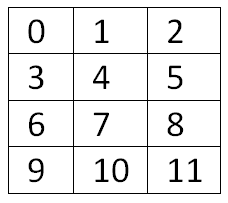

a) En la columna de i huecos por encima de i

In [1]:
# Inicializar el vector PC de 24 bits
PC = [0] * 24

In [2]:
def generar_pc_a(i):
    """
    Genera el vector de precondiciones (PC) para la operación mover(i, j).
    :param i: Celda origen (0-11).
    :return: Lista de 24 bits representando las precondiciones (PC).

    a) Verificamos que en la columna donde está la celda i debe haber huecos por encima de la celda.

    """
    # Número de columnas y filas
    columnas = 3
    filas = 4
    total_celdas = filas * columnas  # Total de celdas (12)



    # Paso a: Verificar que en la columna de la celda i debe haber huecos
    columna_i = i % columnas  # Columna de la celda i
    for fila in range(filas):
        celda = fila * columnas + columna_i  # Índice de la celda en la columna
        if celda<i:
          PC[total_celdas + celda] = 1  # Marcar hueco necesario en esta celda



In [3]:
def generar_pc_b(i):
    """
    Genera el vector de precondiciones (PC) para la operación mover(i, j).
    :param i: Celda origen (0-11).
    :return: Lista de 24 bits representando las precondiciones (PC).

    b) Bloques por debajo de i y en i.

    """
    # Número de columnas y filas
    columnas = 3
    filas = 4
    total_celdas = filas * columnas  # Total de celdas (12)


    # Paso a: Verificar que en la columna de la celda i debe haber huecos
    columna_i = i % columnas  # Columna de la celda i
    for fila in range(filas):
        celda = fila * columnas + columna_i  # Índice de la celda en la columna
        if celda>=i:
          PC[celda] = 1  # Marcar bloque necesario en esta celda



In [4]:
def generar_pc_c(j):
    """
    Genera el vector de precondiciones (PC) para la operación mover(i, j).
    :param i: Celda origen (0-11).
    :return: Lista de 24 bits representando las precondiciones (PC).

    b) Bloques por debajo de j

    """
    # Número de columnas y filas
    columnas = 3
    filas = 4
    total_celdas = filas * columnas  # Total de celdas (12)


    # Paso a: Verificar que en la columna de la celda i debe haber huecos
    columna_j = j % columnas  # Columna de la celda i
    for fila in range(filas):
        celda = fila * columnas + columna_j  # Índice de la celda en la columna
        if celda>j:
          PC[celda] = 1  # Marcar bloque necesario en esta celda



In [5]:
def generar_pc_d(j):
    """
    Genera el vector de precondiciones (PC) para la operación mover(i, j).
    :param i: Celda origen (0-11).
    :return: Lista de 24 bits representando las precondiciones (PC).

    b) Huecos por encima de j y en j

    """
    # Número de columnas y filas
    columnas = 3
    filas = 4
    total_celdas = filas * columnas  # Total de celdas (12)

    # Paso a: Verificar que en la columna de la celda i debe haber huecos
    columna_j = j % columnas  # Columna de la celda i
    for fila in range(filas):
        celda = fila * columnas + columna_j  # Índice de la celda en la columna
        if celda<=j:
          PC[total_celdas+celda] = 1  # Marcar bloque necesario en esta celda



In [6]:
def generar_pc(i,j):
  generar_pc_a(i)
  generar_pc_b(i)
  generar_pc_c(j)
  generar_pc_d(j)
  return PC

In [7]:
def imprimir_pc(PC):
    """
    Imprime el vector de precondiciones (PC) en formato legible.

    :param PC: Lista de 24 bits representando las precondiciones.
    """
    print("PC (24 bits):")
    print(" ".join(map(str, PC[:12])), "<- Bloques (primeros 12 bits)")
    print(" ".join(map(str, PC[12:])), "<- Huecos  (últimos 12 bits)")


# Ejemplo de uso


PC = generar_pc(3,8)
imprimir_pc(PC)

PC (24 bits):
0 0 0 1 0 0 1 0 0 1 0 1 <- Bloques (primeros 12 bits)
1 0 1 0 0 1 0 0 1 0 0 0 <- Huecos  (últimos 12 bits)


# Intento 2

Plan found:
Move B from position_1 to position_2
Move A from position_1 to position_2
Move C from position_1 to position_2
Move D from position_1 to position_3
Move C from position_2 to position_3
Move A from position_2 to position_1
Move B from position_2 to position_3
Move A from position_1 to position_3

Move actions consecutively
Applying action: Move B from position_1 to position_2
Applying action: Move A from position_1 to position_2
Applying action: Move C from position_1 to position_2
Applying action: Move D from position_1 to position_3
Applying action: Move C from position_2 to position_3
Applying action: Move A from position_2 to position_1
Applying action: Move B from position_2 to position_3
Applying action: Move A from position_1 to position_3

Movement matrix:
['B', 'position_1', 'position_2']
['A', 'position_1', 'position_2']
['C', 'position_1', 'position_2']
['D', 'position_1', 'position_3']
['C', 'position_2', 'position_3']
['A', 'position_2', 'position_1']
['B', 'pos

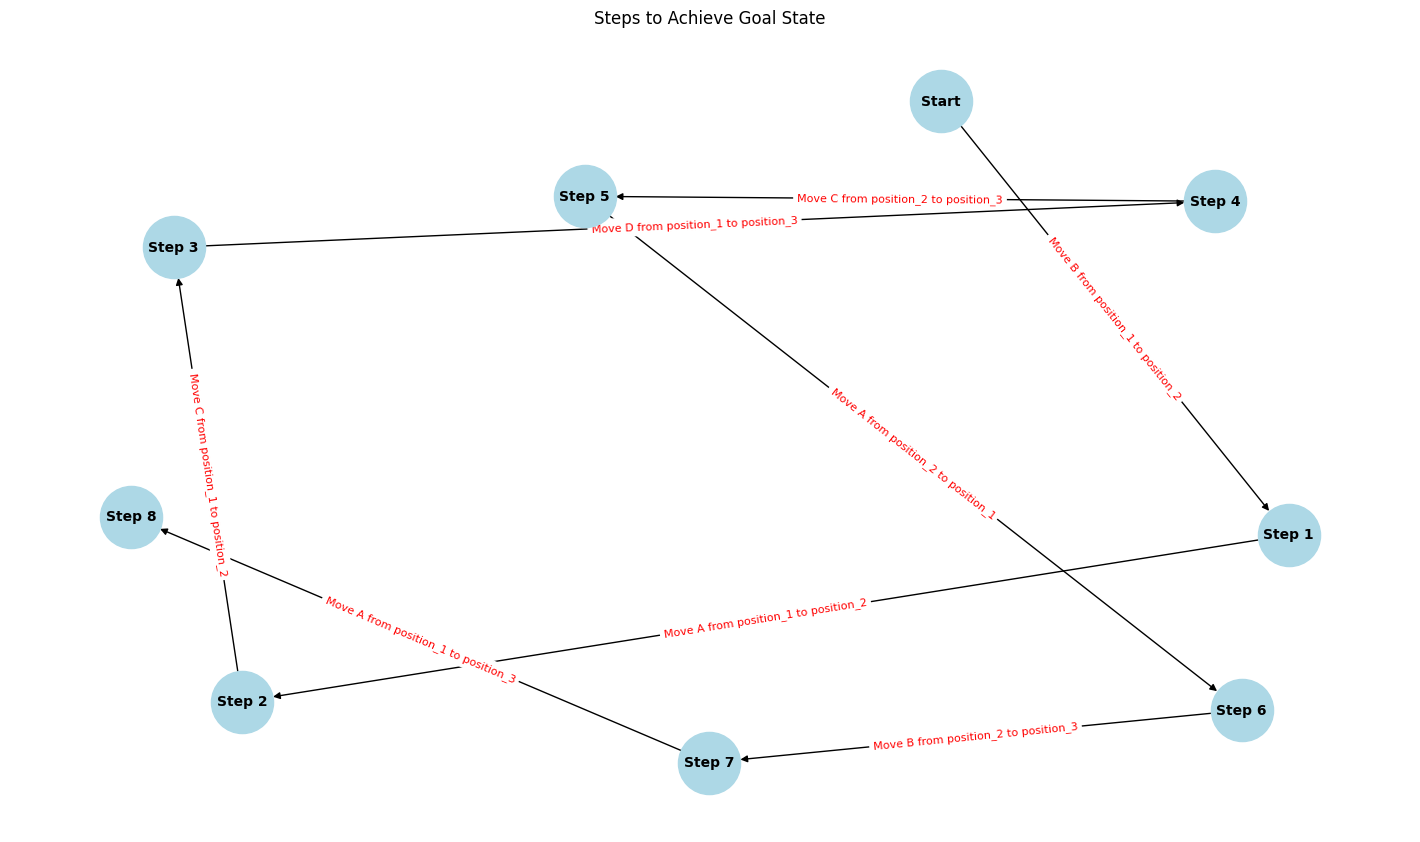

In [20]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

# Define the starting arrangement of blocks and the desired final arrangement
initial_state = {
    "position_1": ["B", "A", "C", "D"],  # Blocks stacked in the first position
    "position_2": [],  # Second position starts empty
    "position_3": []   # Third position starts empty
}

goal_state = {
    "position_1": [],  # First position must be empty in the goal
    "position_2": [],  # Second position must also be empty
    "position_3": ["A", "B", "C", "D"]  # All blocks stacked in order at the third position
}

# Function to move a block from one position to another
def move_block(state, block, source_position, target_position):
    # Ensure the block is on top of the source stack and ready to be moved
    if state[source_position] and state[source_position][0] == block:
        # Make a copy of the current state to preserve immutability
        new_state = {key: value.copy() for key, value in state.items()}
        # Remove the block from the source and place it on top of the target
        new_state[source_position].remove(block)
        new_state[target_position].insert(0, block)
        return new_state
    return None  # Block cannot be moved due to conditions not being met

# Use Breadth-First Search (BFS) to find a sequence of moves to reach the goal
def bfs(initial_state, goal_state):
    frontier = deque([(initial_state, [])])  # Holds states and the moves taken to reach them
    visited = set()  # Tracks visited states to prevent redundant processing

    while frontier:
        current_state, actions = frontier.popleft()

        # If the current state matches the goal, return the sequence of actions
        if current_state == goal_state:
            return actions

        # Explore all possible moves for each block between all valid positions
        for block in ["B", "A", "C", "D"]:
            for i in ["position_1", "position_2", "position_3"]:
                for j in ["position_1", "position_2", "position_3"]:
                    if i != j:  # A block cannot be moved to its current position
                        new_state = move_block(current_state, block, i, j)
                        if new_state and str(new_state) not in visited:
                            visited.add(str(new_state))
                            frontier.append((new_state, actions + [(block, i, j)]))

    return None  # No sequence of moves can achieve the goal

# Run the BFS algorithm to compute the required moves
actions = bfs(initial_state, goal_state)

if actions:
    print("Plan found:")
    for block, source, destination in actions:
        print(f"Move {block} from {source} to {destination}")

    # Simulate applying the actions to the initial state
    state = initial_state
    print(f"\nMove actions consecutively")
    for block, source, destination in actions:
        print(f"Applying action: Move {block} from {source} to {destination}")
        state = move_block(state, block, source, destination)

    # Compile the list of moves into a matrix for review
    movement_matrix = []
    for block, source, destination in actions:
        movement_matrix.append([block, source, destination])

    print("\nMovement matrix:")
    for row in movement_matrix:
        print(row)

    # Create a graph representation of the steps
    graph = nx.DiGraph()
    graph.add_node("Start", label=str(initial_state))

    prev_state = "Start"
    step = 1

    for block, source, destination in actions:
        new_state = move_block(initial_state, block, source, destination)
        node_name = f"Step {step}"
        graph.add_node(node_name, label=str(new_state))
        graph.add_edge(prev_state, node_name, label=f"Move {block} from {source} to {destination}")
        prev_state = node_name
        initial_state = new_state
        step += 1

    # Position nodes with increased separation
    pos = nx.spring_layout(graph, k=2, seed=42)  # Increase k for more separation
    edge_labels = nx.get_edge_attributes(graph, 'label')

    plt.figure(figsize=(14, 8))
    nx.draw(graph, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red', font_size=8)
    plt.title("Steps to Achieve Goal State")
    plt.show()

else:
    print("No plan found.")


# Inicio con binario

In [21]:
#Mover(i,j)
# Crear la matriz inicial 4x3
def crear_matriz(filas, columnas):
    # Creamos la matriz llena de ceros
    return [[0 for _ in range(columnas)] for _ in range(filas)]

# Función para convertir una posición (i, j) a un índice numérico
def posicion_a_indice(i, j, columnas):
    return i * columnas + j

# Función para convertir un índice numérico a una posición (i, j)
def indice_a_posicion(indice, columnas):
    fila = indice // columnas
    columna = indice % columnas
    return fila, columna

# Función para mover un bloque dentro de la matriz
def mover_bloque(i, j, nuevo_i, nuevo_j, matriz, columnas):
    # Verificamos que la nueva posición esté dentro de los límites
    if 0 <= nuevo_i < len(matriz) and 0 <= nuevo_j < len(matriz[0]):
        # Quitamos el bloque de la posición original
        matriz[i][j] = 0
        # Colocamos el bloque en la nueva posición
        matriz[nuevo_i][nuevo_j] = 1
    else:
        print("Posición fuera de los límites")
    return matriz

# Crear la matriz 4x3
filas = 4
columnas = 3
matriz = crear_matriz(filas, columnas)

# Ejemplo: Colocar un bloque en la posición (2, 1)
matriz[2][1] = 1
print("Matriz inicial:")
for fila in matriz:
    print(fila)

# Mover el bloque de la posición (2, 1) a la posición (1, 2)
matriz_actualizada = mover_bloque(2, 1, 1, 2, matriz, columnas)

print("\nMatriz después de mover el bloque:")
for fila in matriz_actualizada:
    print(fila)

# Ejemplo de convertir una posición (2, 1) a un índice numérico
indice = posicion_a_indice(2, 1, columnas)
print(f"\nÍndice numérico para la posición (2, 1): {indice}")

# Ejemplo de convertir un índice numérico (7) a una posición (i, j)
i, j = indice_a_posicion(7, columnas)
print(f"Posición para el índice numérico 7: ({i}, {j})")

Matriz inicial:
[0, 0, 0]
[0, 0, 0]
[0, 1, 0]
[0, 0, 0]

Matriz después de mover el bloque:
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]

Índice numérico para la posición (2, 1): 7
Posición para el índice numérico 7: (2, 1)


Masks

In [22]:
import numpy as np

# Define the MundoBloques class to manage the block world and generate binary masks
class MundoBloques:
    def __init__(self):
        # Initialize the block positions in a 4x3 grid
        self.estado = {
            'A': (1, 0),  # Block A at position (1, 0)
            'B': (0, 0),  # Block B at position (0, 0)
            'C': (2, 0),  # Block C at position (2, 0)
            'D': (3, 0)   # Block D at position (3, 0)
        }
        # Determine the free positions in the grid
        self.libres = {(i, j) for i in range(4) for j in range(3)} - set(self.estado.values())
        self.suelo = {(3, j) for j in range(3)}  # Ground positions in the last row

    def en(self, bloque, pos):
        """Check if a block is in a specific position."""
        return self.estado.get(bloque) == pos

    def sobre(self, bloque1, bloque2):
        """Check if one block is on top of another."""
        pos1 = self.estado.get(bloque1)
        pos2 = self.estado.get(bloque2)
        return pos1 and pos2 and pos1[0] < pos2[0] and pos1[1] == pos2[1]

    def libre(self, pos):
        """Check if a position is free."""
        return pos in self.libres

    def posicion_index(self, pos):
        """Convert a (row, column) position to a linear index for the 4x3 grid."""
        return pos[0] * 3 + pos[1]

    def generar_mascaras(self):
        """Generate binary masks for possible block movements."""
        num_posiciones = 12  # 3 columns x 4 rows = 12 positions
        bloques = ['A', 'B', 'C', 'D']
        mascaras = {}

        for bloque in bloques:
            for fila in range(4):
                for columna in range(3):
                    destino = (fila, columna)

                    # Skip if the block is already at the destination
                    if destino == self.estado[bloque]:
                        continue

                    # Initialize the binary mask with 0s
                    mascara = np.zeros(num_posiciones, dtype=int)

                    # Precondition 1: The block must not have another block on top
                    if not any(self.sobre(bloque, otro_bloque) for otro_bloque in bloques if otro_bloque != bloque):
                        # Precondition 2: The destination position must be free
                        if self.libre(destino):
                            mascara[self.posicion_index(destino)] = 1

                        # Precondition 3: Allow movement to the ground row
                        if destino in self.suelo:
                            mascara[self.posicion_index(destino)] = 1

                    # Save the binary mask for this move
                    mascaras[(bloque, destino)] = mascara.tolist()

        return mascaras


# Create an instance of the block world
mundo = MundoBloques()

# Generate the binary masks
mascaras = mundo.generar_mascaras()

# Display the binary masks for all possible moves
print("Binary masks for possible moves:")
for (bloque, destino), mascara in mascaras.items():
    print(f"Move {bloque} to {destino}: {mascara}")


Binary masks for possible moves:
Move A to (0, 0): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Move A to (0, 1): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Move A to (0, 2): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Move A to (1, 1): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Move A to (1, 2): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Move A to (2, 0): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Move A to (2, 1): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Move A to (2, 2): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Move A to (3, 0): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Move A to (3, 1): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Move A to (3, 2): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Move B to (0, 1): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Move B to (0, 2): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Move B to (1, 0): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Move B to (1, 1): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Move B to (1, 2): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Move B to (2, 0): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Move B to (2, 1): [0, 0, 0, 0, 0

# Ejercicio versión final

## Sin máscaras

In [68]:
class STRIPSWorld:
    def __init__(self):
        # Initial state
        self.initial_state = {
            "en": {"B": "A", "A": "C", "C": "D", "D": "1"},
            "free": {"B"},
            "location": {"1": ["D"], "2": [], "3": []}
        }
        # Goal state
        self.goal_state = {
            "en": {"A": "B", "B": "C", "C": "D", "D": "3"},
            "free": {"A"},
            "location": {"1": [], "2": [], "3": ["D"]}
        }

    def is_goal(self, state):
        """Checks if the current state satisfies the goal state."""
        return state["en"] == self.goal_state["en"] and state["location"] == self.goal_state["location"]

    def possible_actions(self, state):
        """Generates all valid actions in a state."""
        actions = []
        for block, below in state["en"].items():
            if block in state["free"]:
                # Block can be moved to the floor
                for place in ["1", "2", "3"]:
                    if not state["location"][place] or state["location"][place][-1] == below:
                        actions.append(("move", block, place))

                # Block can be stacked on top of another block
                for target in state["free"]:
                    if target != block:
                        actions.append(("stack", block, target))
        return actions

    def apply_action(self, state, action):
        """Updates the state by applying the action."""
        new_state = {
            "en": state["en"].copy(),
            "free": state["free"].copy(),
            "location": {key: value.copy() for key, value in state["location"].items()}
        }
        action_type, block, destination = action

        if action_type == "move":
            # Remove block from its current position
            previous = new_state["en"][block]
            if previous in new_state["location"]:
                new_state["location"][previous].remove(block)
            else:
                new_state["free"].add(previous)
            new_state["en"][block] = destination
            new_state["location"][destination].append(block)

        elif action_type == "stack":
            # Remove block from its current position
            previous = new_state["en"][block]
            if previous in new_state["location"]:
                new_state["location"][previous].remove(block)
            else:
                new_state["free"].add(previous)
            new_state["en"][block] = destination
            new_state["free"].remove(destination)
            new_state["free"].add(block)

        return new_state

    def find_plan(self, state):
        """Performs a depth-first search to find a plan."""
        visited = set()
        plan = []

        def dfs(current_state):
            if self.is_goal(current_state):
                return True
            visited.add(tuple(sorted(current_state["en"].items())))
            for action in self.possible_actions(current_state):
                new_state = self.apply_action(current_state, action)
                if tuple(sorted(new_state["en"].items())) not in visited:
                    plan.append(action)
                    if dfs(new_state):
                        return True
                    plan.pop()
            return False

        if dfs(state):
            return plan
        else:
            return None


# Creation of the STRIPS world
world = STRIPSWorld()

# Generation of the plan
plan = world.find_plan(world.initial_state)

# Display the found plan
if plan:
    print("Plan found:")
    for step in plan:
        print(step)
else:
    print("No plan found.")


Plan found:
('move', 'B', '2')
('move', 'B', '3')
('move', 'A', '2')
('stack', 'B', 'C')
('stack', 'B', 'A')
('move', 'B', '2')
('move', 'A', '3')
('stack', 'B', 'C')
('stack', 'B', 'A')
('move', 'B', '3')
('stack', 'A', 'B')
('move', 'C', '1')
('move', 'A', '2')
('stack', 'B', 'D')
('stack', 'B', 'A')
('move', 'B', '2')
('stack', 'B', 'C')
('move', 'B', '1')
('move', 'A', '3')
('move', 'B', '2')
('stack', 'B', 'D')
('stack', 'B', 'C')
('stack', 'B', 'A')
('move', 'B', '3')
('stack', 'A', 'D')
('move', 'B', '2')
('stack', 'B', 'C')
('move', 'B', '1')
('stack', 'B', 'A')
('move', 'C', '2')
('move', 'B', '3')
('stack', 'B', 'C')
('move', 'B', '2')
('move', 'A', '1')
('move', 'B', '3')
('stack', 'B', 'D')
('stack', 'B', 'C')
('stack', 'B', 'A')
('move', 'B', '1')
('move', 'A', '3')
('stack', 'B', 'D')
('stack', 'B', 'C')
('move', 'B', '2')
('stack', 'B', 'A')
('move', 'B', '3')
('stack', 'A', 'B')
('stack', 'A', 'C')
('stack', 'B', 'D')
('move', 'B', '1')
('stack', 'B', 'A')
('move', 'D',

## Con máscaras

In [77]:
import networkx as nx
import matplotlib.pyplot as plt

class STRIPSWorldBinario:
    def __init__(self):
        """Initializes the STRIPS world in binary format."""
        self.vectorInicial = [1, 2, 1, 3]  # Initial state of blocks A, B, C, D
        self.vectorObjetivo = [3, 3, 2, 1]  # Goal state of blocks A, B, C, D
        self.PC = []  # Preconditions in binary format
        self.E = []   # Negative effects in binary format
        self.A = []   # Positive effects in binary format
        self.operaciones = []  # List to describe operations in text
        self.inicial = int(self.mascaraInicio(), 2)  # Initial state in binary
        self.meta = int(self.mascaraFin(), 2)        # Goal state in binary
        self.definir_operaciones()

    def mascaraInicio(self):
        """Generates the initial binary mask."""
        mascara = ''
        for pos in self.vectorInicial:
            if pos == 1:
                mascara += "100"  # Block in position 1
            elif pos == 2:
                mascara += "010"  # Block in position 2
            elif pos == 3:
                mascara += "001"  # Block in position 3
        return mascara + "1010"  # Bits for free (C) and free (P)

    def mascaraFin(self):
        """Generates the binary mask of the goal state."""
        mascara = ''
        for pos in self.vectorObjetivo:
            if pos == 1:
                mascara += "100"  # Block in position 1
            elif pos == 2:
                mascara += "010"  # Block in position 2
            elif pos == 3:
                mascara += "001"  # Block in position 3
        return mascara + "1010"  # Bits for free (C) and free (P)

    def definir_operaciones(self):
        """Defines the preconditions, effects, and additions for all possible operations."""
        self.PC = []  # List of preconditions
        self.E = []   # List of negative effects
        self.A = []   # List of positive effects
        self.operaciones = []  # List to describe operations in text

        bloques = ['A', 'B', 'C', 'D']  # Blocks in the system
        posiciones = [1, 2, 3]          # Possible positions

        # Operations to move each block to each position
        for bloque_idx, bloque in enumerate(bloques):
            for origen in posiciones:
                for destino in posiciones:
                    if origen != destino:  # Avoid unnecessary movements to the same place
                        pc_bin = ['0'] * 13
                        e_bin = ['1'] * 13
                        a_bin = ['0'] * 13

                        # Preconditions: the block is in the origin position
                        pc_bin[3 * bloque_idx + (origen - 1)] = '1'

                        # Negative effects: the block is no longer in the origin position
                        e_bin[3 * bloque_idx + (origen - 1)] = '0'

                        # Positive effects: the block is now in the destination position
                        a_bin[3 * bloque_idx + (destino - 1)] = '1'

                        # Convert binary lists to integers
                        self.PC.append(int(''.join(pc_bin), 2))
                        self.E.append(int(''.join(e_bin), 2))
                        self.A.append(int(''.join(a_bin), 2))

                        # Save the operation in text
                        self.operaciones.append(f"Move {bloque} from {origen} to {destino}")
        print(f"Operations defined: {len(self.PC)}")

    def aplicar_operacion(self, estado, op):
        """Applies an operation to the state."""
        if estado & self.PC[op] == self.PC[op]:  # Check precondition
            estado = (estado & self.E[op]) | self.A[op]  # Apply effect
        return estado

    def buscar_plan(self):
        """Searches for a plan using binary depth-first search."""
        visitados = set()
        plan = []

        def dfs(estado):
            if estado == self.meta:
                return True
            visitados.add(estado)
            for op in range(len(self.PC)):
                nuevo_estado = self.aplicar_operacion(estado, op)
                if nuevo_estado not in visitados:
                    plan.append(op)
                    if dfs(nuevo_estado):
                        return True
                    plan.pop()
            return False

        if dfs(self.inicial):
            return plan
        else:
            return None

    def mostrar_ultimos_movimientos(self, plan):
        """Muestra el último movimiento de cada bloque al final del plan."""
        # Inicializamos las posiciones de los bloques
        posiciones = {0: '1', 1: '2', 2: '3'}  # Posiciones posibles: 1, 2, 3
        bloques = ['A', 'B', 'C', 'D']  # Bloques A, B, C, D
        # Un diccionario para guardar la última posición de cada bloque
        ultimos_movimientos = {bloque: None for bloque in bloques}

        estado_actual = self.inicial

        # Iteramos sobre el plan para actualizar las posiciones de los bloques
        for paso in plan:
            nuevo_estado = self.aplicar_operacion(estado_actual, paso)
            # Actualizamos las posiciones de los bloques
            for bloque_idx, bloque in enumerate(bloques):
                for i in range(3):  # Para cada bloque, comprobamos sus posiciones
                    if (nuevo_estado >> (3 * bloque_idx + i)) & 1:  # Si el bloque está en la posición i+1
                        ultimos_movimientos[bloque] = posiciones[i + 1]
            estado_actual = nuevo_estado

        # Mostrar los últimos movimientos de cada bloque
        print("Últimos movimientos de cada bloque:")
        for bloque, posicion in ultimos_movimientos.items():
            print(f"{bloque}: Última posición - {posicion}")

    def visualizar_grafo(self, plan):
        """Visualiza el grafo de estados y acciones."""
        G = nx.DiGraph()  # Grafo dirigido

        estado_actual = self.inicial
        G.add_node(estado_actual, label="Inicio")

        # Agregamos los nodos y las transiciones
        for paso in plan:
            nuevo_estado = self.aplicar_operacion(estado_actual, paso)
            descripcion_accion = self.operaciones[paso]
            G.add_node(nuevo_estado, label=descripcion_accion)
            G.add_edge(estado_actual, nuevo_estado, label=descripcion_accion)
            estado_actual = nuevo_estado

        # Dibujar el grafo
        pos = nx.spring_layout(G)  # Posicionamiento automático de los nodos
        labels = nx.get_edge_attributes(G, 'label')
        node_labels = nx.get_node_attributes(G, 'label')

        nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=8, font_weight="bold")
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)

        plt.show()


# Crear el mundo STRIPS
mundo_binario = STRIPSWorldBinario()

# Generar el plan
plan_binario = mundo_binario.buscar_plan()

# Si se encontró un plan, mostrar los últimos movimientos y visualizar el grafo
if plan_binario:
    print("Plan encontrado:")
    for paso in plan_binario:
        print(mundo_binario.operaciones[paso])

    # Mostrar los últimos movimientos de cada bloque
    mundo_binario.mostrar_ultimos_movimientos(plan_binario)

    # Visualizar el grafo de transiciones de estados
    mundo_binario.visualizar_grafo(plan_binario)
else:
    print("No se encontró un plan.")


Operations defined: 24
No se encontró un plan.
